# **1. Import library**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler

# **2. Load data**

In [11]:
# Loading Traning set into dataframe
training_df = pd.read_csv('../data/UNSW_NB15_training-set.csv')
training_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [17]:
# Loading Testing set into dataframe
test_df = pd.read_csv('../data/UNSW_NB15_testing-set.csv')
test_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


# **3. Droping unused columns**

In [29]:
# Droping the 'id' columns of training set
training_df = training_df.drop('id', axis=1)
training_df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal


In [68]:
# Dropping the 'label' column from the training set. This is used to determine whether an attack occurs or not
training_df = training_df.drop('label', axis=1)
training_df.head()

KeyError: "['label'] not found in axis"

In [21]:
training_df.shape

(175341, 44)

In [ ]:
# Droping unused columns in" testing set
test_df = test_df.drop(['id', 'label'], axis=1)
test_df.shape

# **4. Check for NaN values**

In [ ]:
# Check traning set
isNull = training_df.isnull().values.any()
print(f"Traing test has NaN values: {isNull}")
if isNull:
    training_df = training_df.dropna(axis=0)
    training_df.shape

In [ ]:
# Check testing set
isNull = test_df.isnull().values.any()
print(f"Testing test has NaN values: {isNull}")
if isNull:
    test_df = test_df.dropna(axis=0)
    test_df.shape

In [ ]:
# # Merge training and testing sets to ensure all data is processed in the same way
combined_data = pd.concat([training_df, test_df])
combined_data

# **5. One-Hot Encoding Training Set**

In [ ]:
# Pop 'attack_cat' column from combined_data
attack_cat = combined_data.pop('attack_cat')
combined_data.head()

In [ ]:
attack_cat

In [ ]:
# Defining col list
cols = combined_data.select_dtypes(include='object').columns.tolist()
cols

In [ ]:
# Applying one hot encoding to combined data (cols)
combined_data = pd.get_dummies(combined_data, columns=cols)
combined_data

# **6. Data normalization**

In [ ]:
# Khởi tạo bộ chuẩn hóa MinMaxScaler với khoảng giá trị [0,1]
minmax_scale = MinMaxScaler(feature_range=(0, 1))  

In [ ]:
# Normalizing combined data
normalized_data = combined_data.copy()
normalized_data[combined_data.columns] = minmax_scale.fit_transform(combined_data[combined_data.columns])
normalized_data.head()

In [ ]:
# Appending class column to normalized data
normalized_data['attack_cat'] = attack_cat
normalized_data

In [ ]:
# Check for NaN values after normalization
isNull = normalized_data.isnull().values.any()
print(f"Normalized data has NaN values: {isNull}")
if isNull:
    normalized_data = normalized_data.dropna(axis=0)
    normalized_data.shape

# **7. Save normalized data**

In [ ]:
normalized_data.to_csv("../processed_data/normalized_data.csv", index=False)

In [131]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


# **8. Data visualization**

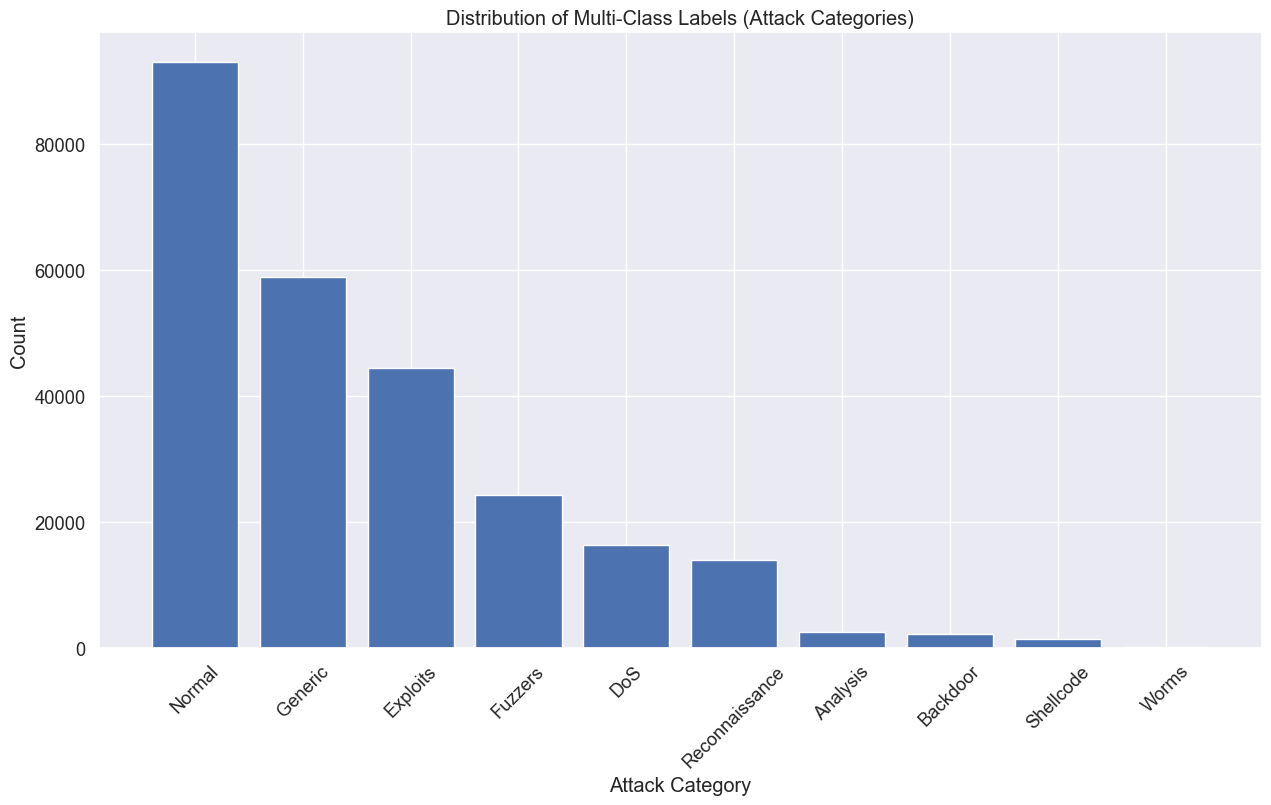

In [168]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 8))

# Plot a bar chart instead of a pie chart
attack_counts = normalized_data.attack_cat.value_counts()
plt.bar(attack_counts.index, attack_counts.values)

# Add labels and title
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Distribution of Multi-Class Labels (Attack Categories)')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Save the figure
plt.savefig('../plots/Bar_chart_multi.png')

# Show the plot
plt.show()


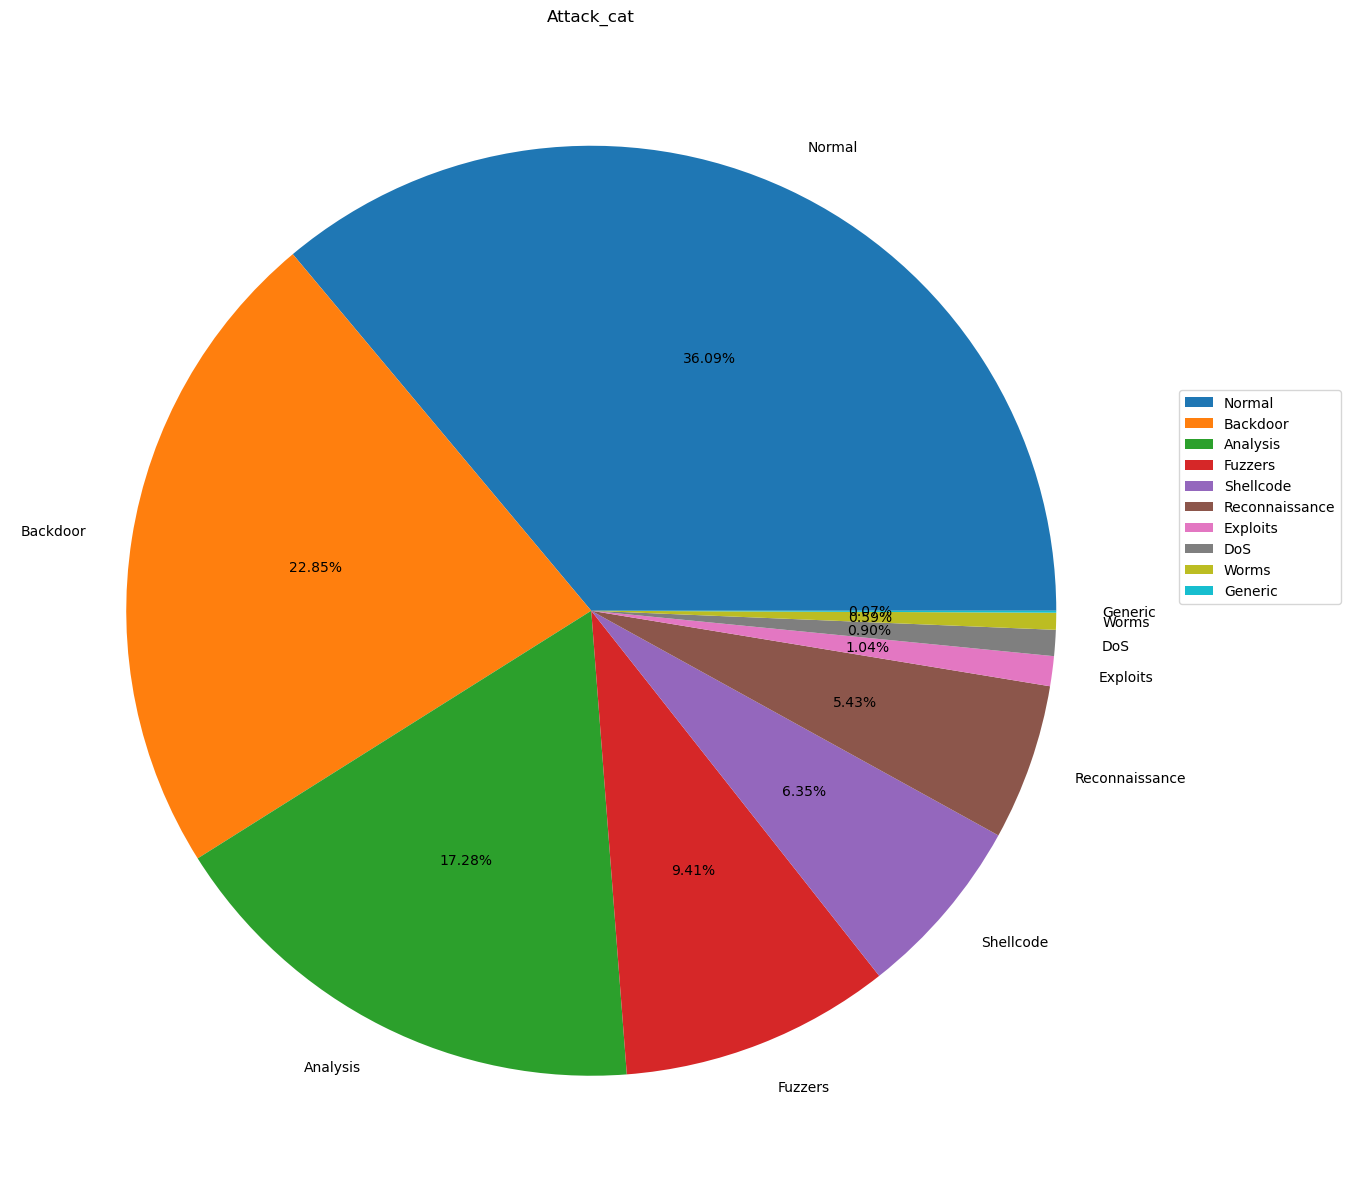

In [139]:
plt.figure(figsize=(15, 25))
plt.pie(normalized_data.attack_cat.value_counts(), labels=normalized_data.attack_cat.unique(), autopct='%0.2f%%')  # Names are taken from attack types arranged from top to bottomplt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.title("Attack_cat")
plt.savefig('../plots/Pie_chart_multi.png')
plt.show()